<img src="emir_color_853x315_trans.png" alt="EMIR logo" style="float: right; width: 150px;"/>

# Reduction of HD209290 (HIP 108782)

Example of reduction of a spectrophotometric standard star.

<img src="esquema_reduccion.png" alt="Reduction scheme" style="float: right; width: 500px; border: 2px solid black; margin: 20px;"/>

The general reduction process is subdivided in two main blocks:

  - `Pyemir` helps to transform the raw data into a 2D rectified and wavelength calibrated image. 

  - The subsequent work, that typically requires taking decisions that in most cases 
    cannot be easily foreseen by an automatic pipeline, can be carried out with the 
    user's favourite software package (i.e. Iraf, MIDAS, idl, python scripts,...).

## Raw data:

Compressed tar.gz file with 6 images: [hd209290_files.tgz](hd209290_files.tgz)

```bash
$ tar zxvf hd209290_files.tgz
$ ls *.fits
0001005263-20160727-EMIR-TEST0.fits  0001005272-20160727-EMIR-TEST0.fits
0001005266-20160727-EMIR-TEST0.fits  0001005275-20160727-EMIR-TEST0.fits
0001005269-20160727-EMIR-TEST0.fits  0001005278-20160727-EMIR-TEST0.fits
```

The content of these files can be rapidly shown using:

```bash
$ dfits 000100*20160727-EMIR-TEST0.fits | fitsort object grism filter exptime date-obs
FILE                               	OBJECT    	GRISM  	FILTER  EXPTIME 	DATE-OBS              	
0001005263-20160727-EMIR-TEST0.fits	HYP 108782	K      	Ksp     9.999289	2016-07-28T04:57:13.05	
0001005266-20160727-EMIR-TEST0.fits	HYP 108782	K      	Ksp     9.999289	2016-07-28T04:58:43.51	
0001005269-20160727-EMIR-TEST0.fits	HYP 108782	H      	H       9.999289	2016-07-28T05:01:55.18	
0001005272-20160727-EMIR-TEST0.fits	HYP 108782	H      	H       9.999289	2016-07-28T05:03:28.79	
0001005275-20160727-EMIR-TEST0.fits	HYP 108782	J      	J       9.999289	2016-07-28T05:08:25.88	
0001005278-20160727-EMIR-TEST0.fits	HYP 108782	J      	J       9.999289	2016-07-28T05:09:21.54
```

Note that `dfits` and `fitsort` are useful tools to quickly examine the header content of a set of FITS files, which belong to the ESO eclipse library. If you do not have eclipse installed in your system, you can download the following stand-alone files (somehow outdated, but that do not require anything else but a C compiler): [dfits.c](dfits.c) and [fitsort.c](fitsort.c).
*Please, note that these files can be directly compiled using any C compiler (e.g.,* `cc -o dfits dfits.c; cc -o fitsort fitsort.c`*)*.

The CSU configuration can be displayed with:
```bash
% pyemir-display_slitlet_arrangement 000100*20160727-EMIR-TEST0.fits
```

<img src="reduction_hd209290/display_slitlet_arrangement1.png" alt="slitlet arrangement" style="float: left; width: 500px;"/>

<img src="reduction_hd209290/display_slitlet_arrangement2.png" alt="slitlet arrangement zoom" style="float: left; width: 500px;"/>

Each bar of the CSU is represented with a different colour. The horizontal axis represents the location of the border of each bar in mm.

## Preliminary reduction of the stellar spectra (A - B)

<div class="alert alert-block alert-info">
The following steps are going to be carried out with the grims J + filter J images. For the other settings (grism H + filter H, and grism K + filter Ksp) the steps are similar.
</div>

### Subtraction of consecutive images to remove the sky spectrum:

The script `numina-imath`, that allows binary image arithmetic, can be use to subtract the corresponding images:

```bash
$ numina-imath 0001005278-20160727-EMIR-TEST0.fits - 0001005275-20160727-EMIR-TEST0.fits hd209290_grismJ_A-B.fits
```

The resulting image, `hd209290_grismJ_A-B.fits` can be easily displayed with ds9 or using:
```bash
$ numina-ximshow hd209290_grismJ_A-B.fits
```

<img src="reduction_hd209290/ximshow1_hd209290_grismJ_A-B.png" alt="grismJ_A-B.fits" style="float: left; width: 500px;"/>

<img src="reduction_hd209290/ximshow2_hd209290_grismJ_A-B.png" alt="grismJ_A-B.fits" style="float: left; width: 500px;"/>

The star spectrum appears with positive (white) and negative (black) number of counts. 

Note that the two displayed images are actually the same but with different background/foreground values.

### Apply bad-pixel mask

The file `BadPixeMask_F.fits`, containing the bad-pixel mask, is available in the [calibrations](calibrations.html) page.

```bash
$ numina-bpm hd209290_grismJ_A-B.fits \
  --bpm BadPixMask_F.fits \
  --outfile hd209290_grismJ_A-B_bpm.fits
```

### Overplot of slitlet boundaries

The detection region spanned by each slitlet can be displayed using:

```bash
$ pyemir-overplot_boundary_model hd209290_grismJ_A-B_bpm.fits \
  --fitted_bound_param refined_multislit_param_grism_J_filter_J.json \
  --ds9reg_boundaries ds9_boundaries_hd209290_grismJ_A-B.reg \
  --ds9reg_frontiers ds9_frontiers_hd209290_grismJ_A-B.reg
```

Note that the optional arguments `--ds9reg_boundaries` or/and `--ds9reg_frontiers` indicate the name of ds9 region files with the boundaries and frontiers of all the slitlets (note that the use of the additional optional parameter `--debugplot 0` would have avoided the plot, generating directly the ds9 region files). 

<img src="reduction_hd209290/boundary1_hd209290_grismJ_A-B.png" alt="boundary grismJ_A-B.fits" style="float: left; width: 500px;"/>

<img src="reduction_hd209290/boundary2_hd209290_grismJ_A-B.png" alt="boundary zoom grismJ_A-B.fits" style="float: left; width: 500px;"/>

In this case, the positive spectrum (white) appears in slitlet number 29, whereas the negative spectrum (black) is located in slitlet number 24.

Blue dotted lines indicate frontiers (actual separation between slitlets), whereas cyan and magenta dotted lines show the slitlet regions where the signal is not seriously affected by the reduction of aperture between consecutive slitlets.

<img src="reduction_hd209290/ds9_boundaries_hd209290.png" alt="grismJ_A-B.fits" style="float: left; width: 500px; margin: 10px;"/>

This plot shows the ds9 image viewer after loading the ds9 region files corresponding to the boundaries and frontiers of each slitlet.

As previously shown, the positive spectrum (white) appears in slitlet number 29, whereas the negative spectrum (black) is located in slitlet number 24.

Blue dotted lines indicate frontiers (actual separation between slitlets), whereas cyan and magenta dotted lines show the slitlet regions where the signal is not seriously affected by the reduction of aperture between consecutive slitlets.

### Flatfield (pixel-to-pixel variation)

For this particular observation, we select the file `continuum_ls05_J_J_on-off_flat.fits`,
from the [calibrations](calibrations.html) page, as the pixel-to-pixel variation flatfield.

```bash
$ numina-imath hd209290_grismJ_A-B_bpm.fits / continuum_ls05_J_J_on-off_flat.fits hd209290_grismJ_A-B_flat.fits
```

### Rectification and wavelength calibration

<div class="alert alert-block alert-danger">
Please, note that in its current state, this functionality still needs to be improved in order to:
<ul>
    <li> Carry out the rectfication process using an interpolation technique that takes into account fraction of pixels preserving the flux (at present the code uses the nearest-neighbor algorithm, which preserves the flux but leads to a typical zigzag pattern; on the other side, this approach is fast).</li>
    <li> Take into account DTU shifts (that still need to be properly calibrated).</li>
</ul>
In addition, it is important to realize that the method described below makes use of an interpolation technique based on calibration images obtained in a discrete sampling of the CSU configuration.
<br><br>
<b>For all those reasons, it is not unexpected that the absolute wavelength calibration might suffer from small systematic offsets.</b>
</div>

**Step 1**: Using the library of rectification and wavelength calibration transformations corresponding to grism J + filter J (file `rect_wpoly_MOSlibrary_grism_J_filter_J.json`; see [calibrations](calibrations.html) page), we derive the particular polynomials for the current CSU configuration:

```bash
$ pyemir-evaluate_rect_wpoly hd209290_grismJ_A-B_flat.fits \
  --rect_wpoly_MOSlibrary rect_wpoly_MOSlibrary_grism_J_filter_J.json \
  --out_rect_wpoly coef_rect_wpoly_hd209290_grismJ_from_mosmodel.json \
  --ignore_DTUconf
```

**Step 2**: Apply the rectification and wavelength calibration polynomials just computed:

```bash
$ pyemir-apply_rect_wpoly hd209290_grismJ_A-B_flat.fits \
  --coef_rect_wpoly coef_rect_wpoly_hd209290_grismJ_from_mosmodel.json \
  --outfile hd209290_grismJ_A-B_rectwv.fits \
  --ignore_DTUconf
```

The wavelength calibration parameters are:
```bash
$ dfits hd209290_grismJ_A-B_rectwv.fits | fitsort CRVAL1 CDELT1
FILE                           	CRVAL1 	CDELT1	
hd209290_grismJ_A-B_rectwv.fits	11200.0	0.77
```

<div class="alert alert-block alert-warning">
The following sections provide a simple example of spectrum extraction and derivation of a response curve. As previously mentioned, the corresponding tasks can be carried out with any astronomical software package (i.e., Iraf, MIDAS,...).</div>

## Spectrum extraction

This section assumes that the user is going to execute the following Python code either within a jupyter notebook:

```bash
$ jupyter notebook
```

or within an ipython terminal:

```bash
$ ipython
```

In the latter case the `% matplotlib inline` magic command must be ignored, and an additional `plt.show()` command must be used to display each matplotlib plot.

First things first: import the python packages that are going to be needed to proceed with the interactive reduction:

In [1]:
% matplotlib inline

from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import numpy as np

from numina.array.display.ximshow import ximshow

Read the FITS file containing the 2D rectified and wavelength calibrated A-B image:

In [2]:
# read FITS image
with fits.open('hd209290_grismJ_A-B_rectwv.fits', mode='readonly') as hdulist:
    image_header = hdulist[0].header
    image_data = hdulist[0].data
    
# image dimensions
naxis2, naxis1 = image_data.shape

print('naxis1:', naxis1)
print('naxis2:', naxis2)

naxis1: 3400
naxis2: 2048


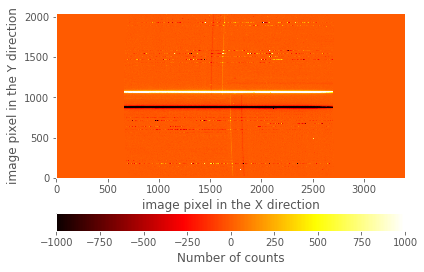

In [3]:
ximshow(image_data, geometry=None, z1z2=(-1000,1000), debugplot=1)

Note that the rectified and wavelength calibrated image create by the script `pyemir-apply_rect_wpoly` does not fill the whole image array: there are zeros in the wavelength (i.e. horizontal) direction, before and after the actual location of the data. This has been done in purpose in order to accommodate, in the same wavelength linear scale, all the EMIR images obtained with different CSU configurations (i.e., with the slitlets in different locations along the wavelength direction).

In [4]:
# read wavelength calibration parameters and exposure time from header
crpix1 = image_header['crpix1']
crval1 = image_header['crval1']
cdelt1 = image_header['cdelt1']
exptime = image_header['exptime']
print('crpix1, crval1, cdelt1:', crpix1, crval1, cdelt1)
print('exptime:', exptime)

crpix1, crval1, cdelt1: 1.0 11200.0 0.77
exptime: 9.999289


Display the image region around the positive star spectrum (slitlet number 29):

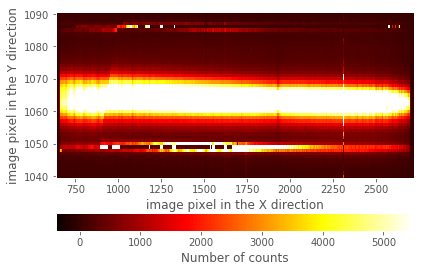

In [5]:
ximshow(image_data, image_bbox=(640,2720,1040,1090), geometry=None, debugplot=1)

Display the image region around the negative star spectrum (slitlet number 24):

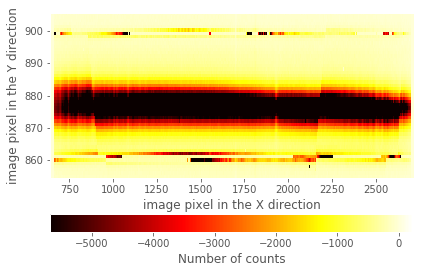

In [6]:
ximshow(image_data, image_bbox=(640,2720,855,905), geometry=None, debugplot=1)

Extract and coadd positive and negative spectra by coadding the corresponding image rows:

In [7]:
# positive spectrum, in counts/second
sp1 = np.sum(image_data[1052:1084,], axis=0) / exptime

# negative spectrum (note the negative sign!), in counts/second
sp2 = -np.sum(image_data[861:891,], axis=0) / exptime

# average of the two spectra
spectrum = (sp1 + sp2) / 2

From the file [plot_single_spectrum.py](plot_single_spectrum.py) load an auxiliary function to plot spectrum (this function avoids to repeat code each time one needs to plot the spectrum or portions of it):

In [8]:
from plot_single_spectrum import plot_single_spectrum

Plot whole spectrum:

(<matplotlib.axes._subplots.AxesSubplot at 0x11892d518>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18277a8588>)

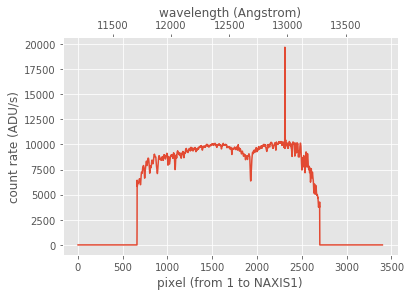

In [9]:
plot_single_spectrum(
    spectrum, 
    ylabel='count rate (ADU/s)', 
    crval1=crval1, 
    cdelt1=cdelt1
)

Plot whole spectrum removing leading and trailing zeros:

(<matplotlib.axes._subplots.AxesSubplot at 0x11892d390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x118982208>)

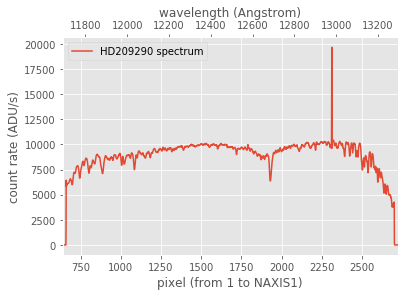

In [10]:
plot_single_spectrum(
    spectrum,
    ylabel='count rate (ADU/s)',
    pixlimits=[640, 2720], 
    label='HD209290 spectrum',
    crval1=crval1, 
    cdelt1=cdelt1
)

Zooming around the pixels affected by cosmetic defects:

(<matplotlib.axes._subplots.AxesSubplot at 0x18276c57b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x182748f9b0>)

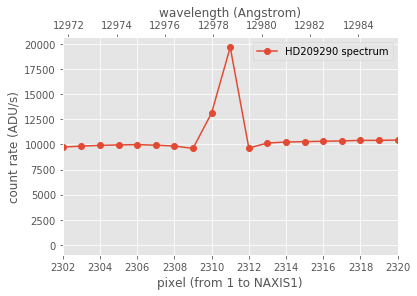

In [11]:
plot_single_spectrum(
    spectrum,
    ylabel='count rate (ADU/s)',
    pixlimits=[2302, 2320], 
    fmt='o-',
    label='HD209290 spectrum',
    crval1=crval1, 
    cdelt1=cdelt1
)

Replace bad pixels by average of local pixels (*remember than numpy array uses 0-based indexing, so it is necessary to subtract 1 from the displayed pixel number*):

In [12]:
# define the whole pixel range encompassing the bad pixel region
initial_pixels = np.arange(2306, 2316)
# define pixels which information is going to be replaced
bad_pixels = np.arange(2310, 2312)
# remove from initial range the bad pixels
good_pixels = np.setdiff1d(initial_pixels, bad_pixels)

# display pixel ranges (double checking!)
print('initial_pixels:', initial_pixels)
print('bad_pixels:', bad_pixels)
print('good_pixels:', good_pixels)

# replace the spectrum in the bad pixels by the local mean
# (note: subtacting 1 to follow 0-based indexing)
spectrum[bad_pixels - 1] = np.mean(spectrum[good_pixels - 1])

initial_pixels: [2306 2307 2308 2309 2310 2311 2312 2313 2314 2315]
bad_pixels: [2310 2311]
good_pixels: [2306 2307 2308 2309 2312 2313 2314 2315]


Display spectrum around cleaned region:

(<matplotlib.axes._subplots.AxesSubplot at 0x182749acc0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1189b6f98>)

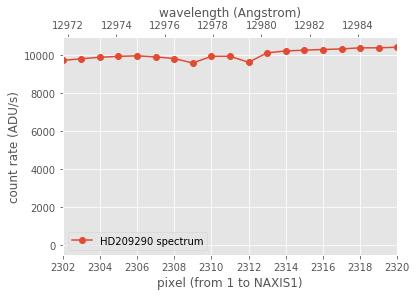

In [13]:
plot_single_spectrum(
    spectrum,
    ylabel='count rate (ADU/s)',
    pixlimits=[2302, 2320], 
    fmt='o-',
    label='HD209290 spectrum',
    crval1=crval1, 
    cdelt1=cdelt1
)

This is not a perfect interpolation, but the information was lost anyhow. Here we are just showing a quick way to remove the bad pixels.

Display whole spectrum again before saving it:

(<matplotlib.axes._subplots.AxesSubplot at 0x18277332b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1827829550>)

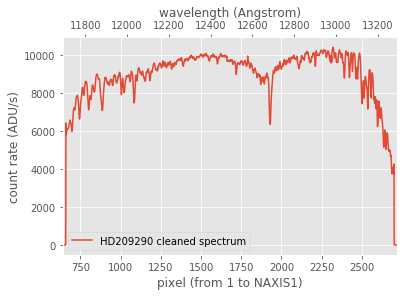

In [14]:
plot_single_spectrum(
    spectrum,
    ylabel='count rate (ADU/s)',
    pixlimits=[640, 2720],
    label='HD209290 cleaned spectrum',
    crval1=crval1, 
    cdelt1=cdelt1
)

In [15]:
# save spectrum into FITS file
hdu_spectrum = fits.PrimaryHDU(data=spectrum, header=image_header)
hdu_spectrum.writeto('hd209290_grismJ_spectrum.fits', overwrite=True)

## Flux calibration

Start by reading the FITS file containing the extracted spectrum and displaying it:

naxis : 1
naxis1: 3400
crpix1, crval1, cdelt1: 1.0 11200.0 0.77
exptime: 9.999289


(<matplotlib.axes._subplots.AxesSubplot at 0x1118882e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x111850780>)

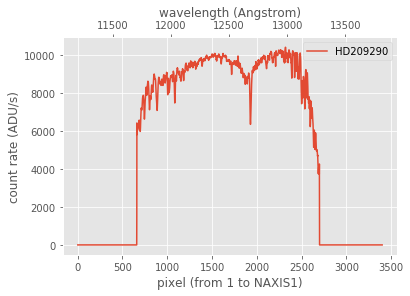

In [16]:
# read FITS image
with fits.open('hd209290_grismJ_spectrum.fits', mode='readonly') as hdulist:
    image_header = hdulist[0].header
    spectrum = hdulist[0].data

print('naxis :', image_header['naxis'])

# image dimension
naxis1 = spectrum.shape[0]
print('naxis1:', naxis1)

# wavelength calibration parameters and exposure time from header
crpix1 = image_header['crpix1']
crval1 = image_header['crval1']
cdelt1 = image_header['cdelt1']
exptime = image_header['exptime']
print('crpix1, crval1, cdelt1:', crpix1, crval1, cdelt1)
print('exptime:', exptime)

# plot spectrum
plot_single_spectrum(
    spectrum,
    ylabel='count rate (ADU/s)',
    label='HD209290',
    crval1=crval1, 
    cdelt1=cdelt1
)

The absolute flux calibrated spectrum of this star can be found in: http://irtfweb.ifa.hawaii.edu/~spex/IRTF_Spectral_Library/index_files/M.html, in particular see the file: http://irtfweb.ifa.hawaii.edu/~spex/IRTF_Spectral_Library/Data/M0.5V_HD209290.txt

In [17]:
# read absolute flux calibration for the star
table_flux_tabulated = np.genfromtxt(
    "http://irtfweb.ifa.hawaii.edu/~spex/IRTF_Spectral_Library/Data/M0.5V_HD209290.txt"
)
print(table_flux_tabulated)

[[ 8.074530e-01  1.484350e-11  3.487900e-14]
 [ 8.076550e-01  1.492060e-11  3.509390e-14]
 [ 8.078580e-01  1.494630e-11  3.503310e-14]
 ...
 [ 5.422893e+00 -9.990000e+02 -9.990000e+02]
 [ 5.423898e+00 -9.990000e+02 -9.990000e+02]
 [ 5.424903e+00 -9.990000e+02 -9.990000e+02]]


Take care of the units:

In [18]:
# Wavelength (microns): convert to Angstrom
xtab = table_flux_tabulated[:,0] * 10000
# Flux Density (W m-2 um-1)
ytab = table_flux_tabulated[:,1]

Resample tabulated data to the observed star spectrum sampling:

In [19]:
# load auxiliary function to convert from pixel to wavelength
from plot_single_spectrum import funwave

# define wavelength scale for the observed star spectrum
wave = funwave(np.arange(1, naxis1 + 1), crval1=crval1, cdelt1=cdelt1)

# resample tabulated spectrum to sampling of observed spectrum
from scipy.interpolate import interp1d
funinterp = interp1d(xtab, ytab, kind="linear")
yflux = funinterp(wave)

From the file [plot_list_spectra.py](plot_list_spectra.py) load an auxiliary function to overplot several spectra: 

In [20]:
from plot_list_spectra import plot_list_spectra

Overplot both the observed and tabulated spectra, as well as the corresponding telluric transmission curve:

(<matplotlib.axes._subplots.AxesSubplot at 0x11828b5f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1185c0400>)

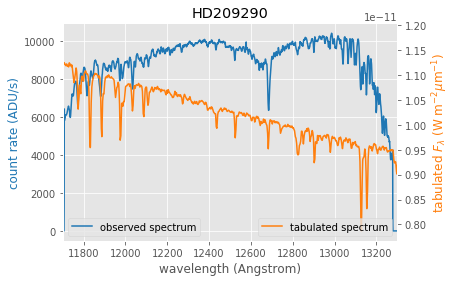

In [21]:
plot_list_spectra(
    wave, [spectrum, yflux],
    xlabel='wavelength (Angstrom)',
    list_ylabel=['count rate (ADU/s)',
                 r'tabulated $F_\lambda$ (W m$^{-2} \mu\rm{m}^{-1}$)'],
    xlimits=[11700, 13300],
    title='HD209290',
    list_label=['observed spectrum', 'tabulated spectrum']
)

Repeat previous plot but zooming in a particular wavelength range:

(<matplotlib.axes._subplots.AxesSubplot at 0x11867b860>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1185fda58>)

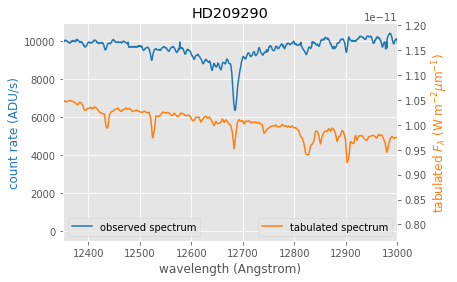

In [22]:
plot_list_spectra(
    wave, [spectrum, yflux], 
    xlabel='wavelength (Angstrom)',
    list_ylabel=['count rate (ADU/s)',
                 r'tabulated $F_\lambda$ (W m$^{-2} \mu\rm{m}^{-1}$)'],
    xlimits=[12350, 13000],
    title='HD209290',
    list_label=['observed spectrum', 'tabulated spectrum']
)

Since the spectral resolution of the tabulated spectrum is slightly worse than the one in the observed spectrum, we convolve the observed spectrum (using a gaussian kernel), although this operation degrades the spectral resolution of the data!

Note that many of the spectroscopic features correspond actually to telluric absorptions.

(<matplotlib.axes._subplots.AxesSubplot at 0x1185be898>,
 <matplotlib.axes._subplots.AxesSubplot at 0x118720320>)

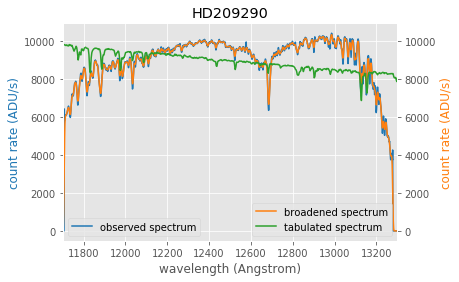

In [23]:
from scipy.ndimage.filters import gaussian_filter

sigma_obs = 3  # by 'eye'
spectrum_broad = gaussian_filter(spectrum, sigma=sigma_obs)

plot_list_spectra(
    wave, [spectrum, spectrum_broad, yflux], 
    xlabel='wavelength (Angstrom)',
    list_ylabel=['count rate (ADU/s)', 'count rate (ADU/s)'],
    xlimits=[11700, 13300],
    same_ylimits=True,
    title='HD209290',
    list_label=['observed spectrum', 
                'broadened spectrum',
                'tabulated spectrum']
)

Compute preliminary response curve

(<matplotlib.axes._subplots.AxesSubplot at 0x1184686d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1184a6940>)

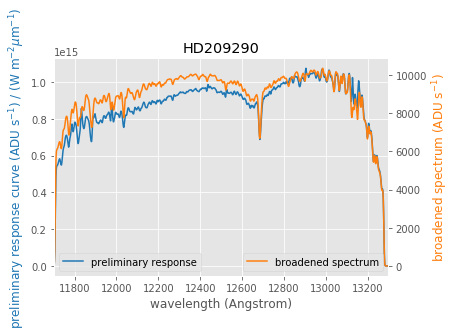

In [24]:
# preliminary response curve
yratio = spectrum_broad / yflux

plot_list_spectra(
    wave, [yratio, spectrum_broad], 
    xlabel='wavelength (Angstrom)',
    list_ylabel=[r'preliminary response curve (ADU s$^{-1}$) / (W m$^{-2} \mu\rm{m}^{-1})$',
                 r'broadened spectrum (ADU s$^{-1}$)'],
    xlimits=[11700, 13300],
    title='HD209290',
    list_label=['preliminary response', 'broadened spectrum']
)

The preliminary response curve still contains all the telluric features.

A high-resolution telluric transmission curve has been retrieved using the [ESO Sky Model Calculator](http://www.eso.org/observing/etc/bin/gen/form?INS.MODE=swspectr+INS.NAME=SKYCALC). This curve has been saved in the file [skycalc_transmission_R20000.txt](skycalc_transmission_R20000.txt).

(<matplotlib.axes._subplots.AxesSubplot at 0x11851dd30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1822db0710>)

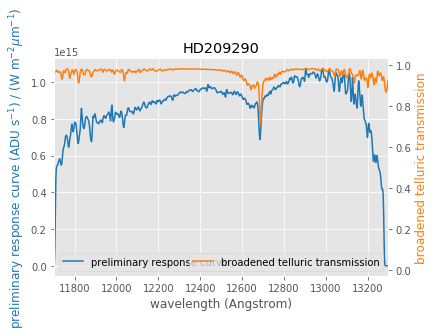

In [25]:
# read telluric transmission
telluric_tabulated = np.genfromtxt("skycalc_transmission_R20000.txt")
xtab = telluric_tabulated[:,0] * 10  # convert from nm to Angstrom
ytab = telluric_tabulated[:,1]

# resample previous spectrum to sampling of observed spectrum
funinterp = interp1d(xtab, ytab, kind="linear")
ytelluric = funinterp(wave)

# broaden telluric transmission
sigma_tel = 4  # by 'eye'
ytelluric_broad = gaussian_filter(ytelluric, sigma=sigma_tel)

plot_list_spectra(
    wave, [yratio, ytelluric_broad], 
    xlabel='wavelength (Angstrom)',
    list_ylabel=[r'preliminary response curve (ADU s$^{-1}$) / (W m$^{-2} \mu\rm{m}^{-1})$',
                 'broadened telluric transmission'],
    xlimits=[11700, 13300],
    list_fmt=['-','-'],
    title='HD209290',
    list_label=['preliminary response curve', 
                'broadened telluric transmission']
)

In [26]:
# save preliminary response curve
hdu_sp = fits.PrimaryHDU(data=yratio, header=image_header)
hdu_sp.writeto('hd209290_grismJ_preliminary_response_curve.fits', overwrite=True)

Obtain an approximate response curve with a first-order correction of telluric features (the telluric transmission correspond to airmass = 1.0):

(<matplotlib.axes._subplots.AxesSubplot at 0x182325e9b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1823022fd0>)

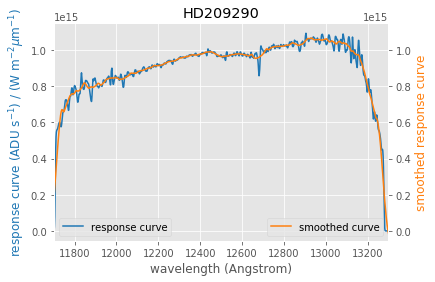

In [27]:
# ratio between response curve and atmosphere transmission
yratioplus = yratio / ytelluric_broad

# smoothed version of previous curve
from scipy.signal import savgol_filter
yratiosmooth = savgol_filter(yratioplus, window_length=101, polyorder=2)

plot_list_spectra(
    wave, [yratioplus, yratiosmooth], 
    xlabel='wavelength (Angstrom)',
    list_ylabel=[r'response curve (ADU s$^{-1}$) / (W m$^{-2} \mu\rm{m}^{-1})$',
                 'smoothed response curve'],
    xlimits=[11700, 13300],
    same_ylimits=True,
    title='HD209290',
    list_label=['response curve', 'smoothed curve']
)

Keep in mind that the previous work should be done more carefully, including:
- A proper estimation of the broadening fuction, for both the tabulated absolute calibrated spectrum and the telluric absorption spectrum (note that this function can depend on the wavelength range!).
- A more detailed work with the wavelength matching of all the spectra, in order to account for the observed radial velocity of the star (including the projection of the Earth's velocity around the Sun at the observation time), conversion from air to vacuum wavelengths (when necessary), and unaccounted systematic wavelength calibration errors.
- A better telluric correction: here we have employed the curve downloaded from the ESO web page previously mentioned. This curve has been computed for Paranal, with airmass=1.0. Obviously this is not going to perform nicely for actual data obtained in La Palma.

Note that we have arbitrarily smoothed the resulting response curve to get rid of some imperfections introduced by the followed method.

The telluric correction could be skipped if one wants to apply the actual telluric absorptions that appear in the standard star spectrum. This should work fine if the curve is applied to a target spectrum observed at a similar airmass (preferably close in time to the observation of the standard star). 

In [28]:
# save smoothed response curve
hdu_sp = fits.PrimaryHDU(data=yratiosmooth, header=image_header)
hdu_sp.writeto('hd209290_grismJ_response_curve.fits', overwrite=True)

In [29]:
%%bash
date

Thu Apr  5 15:34:22 CEST 2018
